# Exercise 2

This notebook shows how we can perform linear regression on a dataset, this time using gradient descent.

We generate a noisy dataset (same as in a previous exercise):

In [1]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


As you can see, X and y are numpy arrays. We generated 1000 samples, with one feature per sample, and y are the corresponding labels for each sample.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

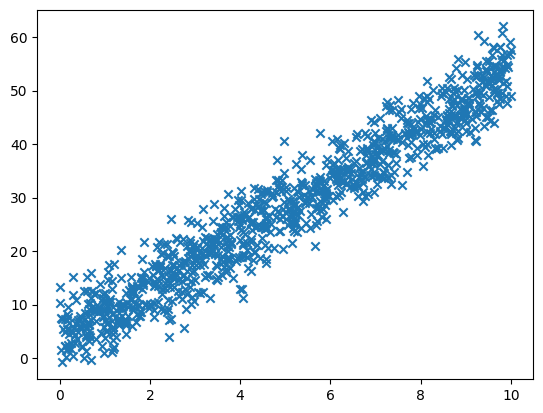

In [4]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Performing linear regression with backpropagation

Your tasks in this notebook are:
 - Add a column of ones to `X`, as we want to simplify the bias calculation (as in the previous exercise)
 - Calculate the predictions as you did in the first exercise, with a matrix multiplication.
 - Calculate the loss based on the mean-squared-error. Use `y` for computing the loss, not `ground_truth`.
 - Derive a formula for calculating the gradient for this example. Then, implement it using numpy. The result of the gradient should be `[[-366.03967789]
 [ -56.30949238]]` (since I seeded the random generators every time, we should all get the same results).

 - Write a loop that performs loss calculation, gradient calculation and updating the weights via a defined learning rate for a given number of iterations (e.g. 100 or 1000). Does it converge? Try different learning rates.
 - If your solution converges, draw the regressed line along with the data points.

## Solution

In [5]:
def generate_weights(num_features):
    np.random.seed(42) # this is just so that we all generate the same weights and thus get the same results
    return (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)

weights = generate_weights(X.shape[-1] + 1) # +1 because you will add the column of ones later on
print(weights)

[[-0.17742707]
 [ 0.63740628]]


In [ ]:
# Adding ones to the features matrix
X_ones = np.hstack([X, np.ones((X.shape[0], 1))])
X_ones

array([[5.48813504, 1.        ],
       [7.15189366, 1.        ],
       [6.02763376, 1.        ],
       ...,
       [9.38412022, 1.        ],
       [2.28646551, 1.        ],
       [6.77141144, 1.        ]], shape=(1000, 2))

In [10]:
# Generating weights 
weights = generate_weights(X.shape[-1] + 1)

# Calculating predictions 
y_pred = X_ones @ weights

# Calculating the loss
loss = np.mean((y_pred - y) ** 2)

# Deriving a formula for gradient and calculating gradient
gradient = (2 / n_samples) * (X_ones.T @ (y_pred - y))

print(f"Initial Weights:\n{weights}")
print(f"Initial Loss: {loss}")
print(f"Calculated Gradient:\n{gradient}")

Initial Weights:
[[-0.17742707]
 [ 0.63740628]]
Initial Loss: 1030.5996567892532
Calculated Gradient:
[[-366.03967789]
 [ -56.30949238]]


In [8]:
# Reset weights to ensure clean start
weights = generate_weights(X.shape[-1] + 1)

# Assuming learning rates
learning_rate = 0.001 
iterations = 10000
loss_history = []

print("\nStarting training...")

for i in range(iterations):
    # 1. Prediction
    y_pred = X_ones @ weights
    
    # 2. Loss Calculation
    current_loss = np.mean((y_pred - y) ** 2)
    loss_history.append(current_loss)
    
    # 3. Gradient Calculation
    gradient = (2 / n_samples) * (X_ones.T @ (y_pred - y))
    
    # 4. Update Weights
    weights = weights - (learning_rate * gradient)
    
    # Print status every 1000 iterations
    if i % 1000 == 0:
        print(f"Iteration {i}: Loss = {current_loss:.4f}")

print(f"\nFinal Weights (Bias, Slope):\n{weights}")


Starting training...
Iteration 0: Loss = 1030.5997
Iteration 1000: Loss = 15.2455
Iteration 2000: Loss = 15.0416
Iteration 3000: Loss = 14.9666
Iteration 4000: Loss = 14.9390
Iteration 5000: Loss = 14.9289
Iteration 6000: Loss = 14.9252
Iteration 7000: Loss = 14.9238
Iteration 8000: Loss = 14.9233
Iteration 9000: Loss = 14.9231

Final Weights (Bias, Slope):
[[4.96307232]
 [3.29619025]]


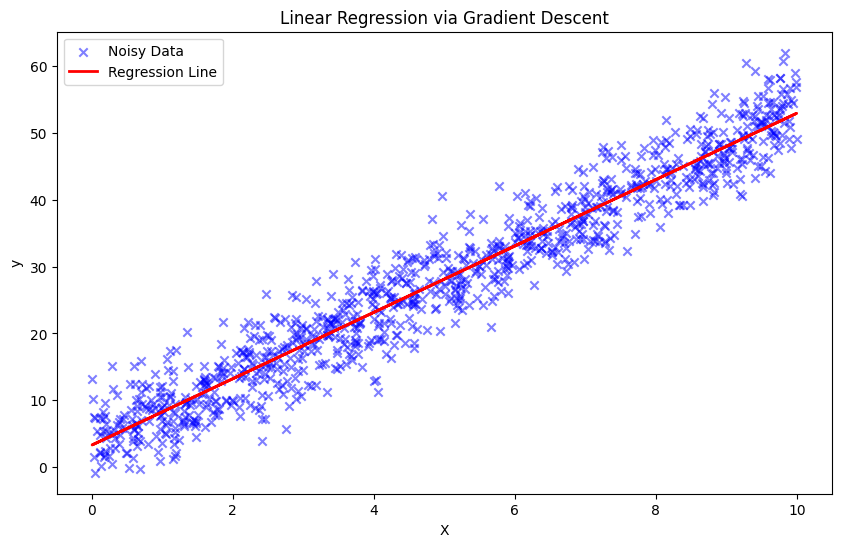

In [9]:
# Plotting the original data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, marker="x", color="blue", alpha=0.5, label="Noisy Data")

# Calculating the final regression line
final_predictions = X_ones @ weights

# Plotting the regression line
plt.plot(X, final_predictions, color="red", linewidth=2, label="Regression Line")

plt.title("Linear Regression via Gradient Descent")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()